## Week 7 Final Assignment (Individual)
### Woon Yoke Min   U1921797E
### Credit Card Default
### Deployed on Heroku: https://yokemin-credit-card-default.herokuapp.com/
#### ** Assumptions for models are written at the bottom

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 10)

### Import Data

In [2]:
df = pd.read_csv("Credit Card Default II (balance).csv")

In [3]:
df

,income,age,loan,default
0,66155.925100,59.017015,8106.532131,0
1,34415.153970,48.117153,6564.745018,0
2,57317.170060,63.108049,8020.953296,0
3,42709.534200,45.751972,6103.642260,0
4,66952.688850,18.584336,8770.099235,1
...,...,...,...,...
3423,60903.191726,21.933924,10367.081892,1
3424,62235.644695,25.033016,8083.900063,1
3425,25597.850590,26.350344,3810.110335,1
3426,48164.194974,23.141976,6529.652892,1


In [4]:
df.describe()

,income,age,loan,default
count,3428.000000,3428.000000,3428.000000,3428.000000
mean,45136.875975,34.795950,5591.986695,0.500000
std,14425.486619,12.840055,3174.522430,0.500073
min,20014.489470,-52.423280,1.377630,0.000000
25%,32827.211177,25.171939,3103.357467,0.000000
50%,45546.632873,30.086842,5540.305046,0.500000
75%,57514.794130,44.369461,7809.377943,1.000000
max,69995.685580,63.971796,13766.051240,1.000000


### Check any imbalance

In [5]:
df["default"].value_counts()

1    1714
0    1714
Name: default, dtype: int64

Assumption: Data is balanced.

### Check correlation

In [6]:
df.corr()

,income,age,loan,default
income,1.000000,-0.028192,0.556173,-0.012761
age,-0.028192,1.000000,-0.247657,-0.653537
loan,0.556173,-0.247657,1.000000,0.508285
default,-0.012761,-0.653537,0.508285,1.000000


### Data Cleaning

#### Remove NA Values

In [7]:
# Check for null values
print(df.isnull().sum().sort_values())   

# There are no rows with null values

income     0
age        0
loan       0
default    0
dtype: int64


#### Remove Not A Number

In [8]:
 for i in df.columns:
    df1 = pd.to_numeric(df[i], errors = 'coerce')
    df = df[df1.notnull()]  # make it to null then remove null

In [9]:
print(df)  # There are no rows with NAN

            income        age          loan  default
0     66155.925100  59.017015   8106.532131        0
1     34415.153970  48.117153   6564.745018        0
2     57317.170060  63.108049   8020.953296        0
3     42709.534200  45.751972   6103.642260        0
4     66952.688850  18.584336   8770.099235        1
...            ...        ...           ...      ...
3423  60903.191726  21.933924  10367.081892        1
3424  62235.644695  25.033016   8083.900063        1
3425  25597.850590  26.350344   3810.110335        1
3426  48164.194974  23.141976   6529.652892        1
3427  33055.808635  26.289612   5351.851138        1

[3428 rows x 4 columns]


#### Remove negative age values

In [10]:
print(df[df.age<0])   # There are 3 rows where age is negative

         income        age         loan  default
15  50501.72669 -28.218361  3977.287432        0
21  32197.62070 -52.423280  4244.057136        0
26  63287.03891 -36.496976  9595.286289        0


In [11]:
df = df[df.age>0]
print(df)

            income        age          loan  default
0     66155.925100  59.017015   8106.532131        0
1     34415.153970  48.117153   6564.745018        0
2     57317.170060  63.108049   8020.953296        0
3     42709.534200  45.751972   6103.642260        0
4     66952.688850  18.584336   8770.099235        1
...            ...        ...           ...      ...
3423  60903.191726  21.933924  10367.081892        1
3424  62235.644695  25.033016   8083.900063        1
3425  25597.850590  26.350344   3810.110335        1
3426  48164.194974  23.141976   6529.652892        1
3427  33055.808635  26.289612   5351.851138        1

[3425 rows x 4 columns]


#### Remove Outliers

In [12]:
import numpy as np
from scipy import stats

In [13]:
# Remove outlier
z = stats.zscore(df.astype(np.float)) #zscore conversion need float
z = np.abs(z) #convert all to positive because the parity is not important
f = (z < 3).all(axis=1) #3 is your choice, axis =1 means by columns, f is a flag

C:\Users\woony\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [14]:
df = df[f]
print(df)

            income        age          loan  default
0     66155.925100  59.017015   8106.532131        0
1     34415.153970  48.117153   6564.745018        0
2     57317.170060  63.108049   8020.953296        0
3     42709.534200  45.751972   6103.642260        0
4     66952.688850  18.584336   8770.099235        1
...            ...        ...           ...      ...
3423  60903.191726  21.933924  10367.081892        1
3424  62235.644695  25.033016   8083.900063        1
3425  25597.850590  26.350344   3810.110335        1
3426  48164.194974  23.141976   6529.652892        1
3427  33055.808635  26.289612   5351.851138        1

[3425 rows x 4 columns]


### Data Visualization

In [15]:
import matplotlib.pyplot as plt

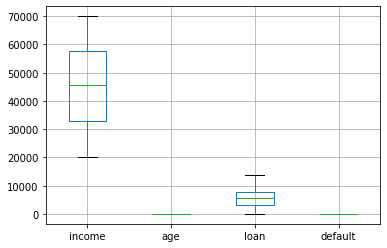

In [16]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C5D7149C48>,
      dtype=object)

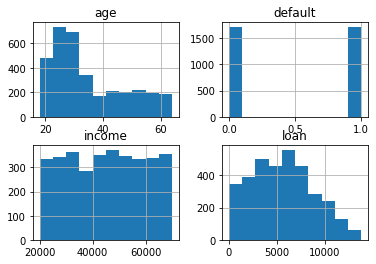

In [17]:
df.hist()

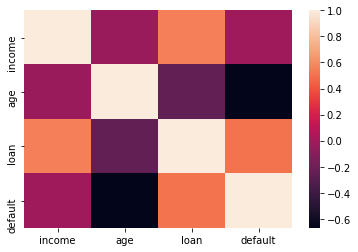

In [18]:
import seaborn as sns
sns.heatmap(df.corr())

### Split X, Y

In [19]:
X = df.loc[:,["income","age","loan"]]
Y = df.loc[:,"default"]

In [20]:
print(X,Y)

            income        age          loan
0     66155.925100  59.017015   8106.532131
1     34415.153970  48.117153   6564.745018
2     57317.170060  63.108049   8020.953296
3     42709.534200  45.751972   6103.642260
4     66952.688850  18.584336   8770.099235
...            ...        ...           ...
3423  60903.191726  21.933924  10367.081892
3424  62235.644695  25.033016   8083.900063
3425  25597.850590  26.350344   3810.110335
3426  48164.194974  23.141976   6529.652892
3427  33055.808635  26.289612   5351.851138

[3425 rows x 3 columns] 0       0
1       0
2       0
3       0
4       1
       ..
3423    1
3424    1
3425    1
3426    1
3427    1
Name: default, Length: 3425, dtype: int64


### Normalize Data

In [21]:
# normalization
from scipy import stats
import numpy as np 
pd.set_option('display.max_rows', 10)

In [22]:
X["income"] = stats.zscore(X["income"].astype(np.float))
X["age"] = stats.zscore(X["age"].astype(np.float))
X["loan"] = stats.zscore(X["loan"].astype(np.float))

C:\Users\woony\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
C:\Users\woony\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\woony\anaconda3\lib\site-packages\ipykernel_launcher.p

### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(X_train,X_test,Y_train,Y_test)

        income       age      loan
2850 -1.287902 -0.175666 -0.659669
1594 -0.832456  1.272703 -0.447846
484  -1.260140  1.612620 -0.446902
2717  1.177170 -0.550738  1.996321
1863  0.906956 -0.589286  1.256935
...        ...       ...       ...
2771 -0.421704 -0.916432  0.123511
3074  0.089521 -0.767342  0.166428
3020 -0.286875 -0.697266  0.353456
1102 -1.499237  1.405195 -0.305194
652  -1.147767 -1.062248 -1.245061

[2397 rows x 3 columns]         income       age      loan
1754  1.379409  0.145427 -1.058339
721  -1.526091  0.429634 -1.314798
2298  1.187220 -0.597633  0.973241
3209 -1.654126 -0.951803 -0.918470
1312  0.331002 -0.419644 -0.846949
...        ...       ...       ...
1752  1.177248 -0.324919  2.055187
376   1.470150  0.057795 -1.020880
2867  0.332819 -0.329567  0.638918
2467  0.143907 -0.834027  0.743566
2282 -0.544157 -0.609580  0.242090

[1028 rows x 3 columns] 2850    1
1594    0
484     0
2717    1
1863    1
       ..
2771    1
3074    1
3020    1
1102    0
652     0


## AI Model 1: Logistic Regression

In [25]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

In [26]:
logreg_model = linear_model.LogisticRegression()

In [27]:
logreg_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
pred = logreg_model.predict(X_train)

In [29]:
cm = confusion_matrix(Y_train,pred)

In [30]:
print(cm)

[[1116   84]
 [  37 1160]]


In [31]:
# Train set accuracy
accuracy = (cm[0,0]+cm[1,1])/sum(sum(cm))
print("Train set accuracy: ", accuracy)

Train set accuracy:  0.9495202336253651


In [32]:
pred = logreg_model.predict(X_test)

In [33]:
cm = confusion_matrix(Y_test, pred)

In [34]:
print(cm)

[[476  35]
 [ 13 504]]


In [35]:
# Test set accuracy
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print("Test set accuracy: ", accuracy)

# The accuracy of the train and test set are close to each other

Test set accuracy:  0.953307392996109


## AI Model 2: Decision Tree

In [36]:
from sklearn import tree

In [37]:
tree_model = tree.DecisionTreeClassifier()

In [38]:
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
pred = tree_model.predict(X_test)

In [40]:
cm = confusion_matrix(Y_test, pred)

In [41]:
print((cm[0, 0] + cm[1, 1])/sum(sum(cm)))

0.9912451361867705


### Optimization: Split to validation set

In [42]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_train, Y_train)

In [43]:
for i in range(10):
    model = tree.DecisionTreeClassifier(max_depth = i+1)
    model.fit(X_train1, Y_train1)
    pred = model.predict(X_test1)
    cm = confusion_matrix(Y_test1, pred)
    print(i+1)
    print((cm[0, 0] + cm[1, 1])/sum(sum(cm)))
    print("+++++++++++++++++++++++++++++++++")

1
0.8616666666666667
+++++++++++++++++++++++++++++++++
2
0.93
+++++++++++++++++++++++++++++++++
3
0.9366666666666666
+++++++++++++++++++++++++++++++++
4
0.9666666666666667
+++++++++++++++++++++++++++++++++
5
0.975
+++++++++++++++++++++++++++++++++
6
0.9933333333333333
+++++++++++++++++++++++++++++++++
7
0.995
+++++++++++++++++++++++++++++++++
8
0.995
+++++++++++++++++++++++++++++++++
9
0.9933333333333333
+++++++++++++++++++++++++++++++++
10
0.9933333333333333
+++++++++++++++++++++++++++++++++


In [48]:
# Take 7 since its the highest
tree_model = tree.DecisionTreeClassifier(max_depth = 7)

In [49]:
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
pred = tree_model.predict(X_test)

In [51]:
cm = confusion_matrix(Y_test, pred)

In [52]:
print((cm[0, 0] + cm[1, 1])/sum(sum(cm)))

0.9902723735408561


### Optimization using Grid

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
model = tree.DecisionTreeClassifier()

In [55]:
g = GridSearchCV(estimator = model, param_grid = dict(max_depth = [i for i in range(2, 20)]))

In [56]:
dict(max_depth = [i for i in range(2, 20)])

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [57]:
g.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 

In [58]:
g.best_params_

{'max_depth': 17}

#### Grid recommended max_depth = 17

In [67]:
g = GridSearchCV(estimator = model, param_grid = dict(min_samples_split = [i for i in range(5, 300)]))

In [68]:
g.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12, 1

In [69]:
g.best_params_

{'min_samples_split': 5}

#### Grid recommended min_samples_split = 5

In [70]:
# Take max_depth = 17 and min_samples_split = 5
tree_model = tree.DecisionTreeClassifier(max_depth = 17, min_samples_split = 5)

In [71]:
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
pred = tree_model.predict(X_test)

In [73]:
cm = confusion_matrix(Y_test, pred)

In [74]:
print((cm[0, 0] + cm[1, 1])/sum(sum(cm)))

0.9902723735408561


### Optimizing using Grid and using the validation set is about the same

## AI Model 3: Random Forest

In [75]:
from sklearn import ensemble

In [76]:
# Initial usage of the model without optimization
rf_model = ensemble.RandomForestClassifier(max_depth = 2)

In [77]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
pred = rf_model.predict(X_train)

In [79]:
cm = confusion_matrix(Y_train,pred)

In [80]:
print(cm)

[[1066  134]
 [   6 1191]]


In [81]:
# Train set accuracy
accuracy = (cm[0,0]+cm[1,1])/sum(sum(cm))
print("Train set accuracy: ", accuracy)

Train set accuracy:  0.9415936587400918


In [82]:
pred = rf_model.predict(X_test)

In [83]:
cm = confusion_matrix(Y_test, pred)

In [84]:
print(cm)

[[462  49]
 [  5 512]]


In [85]:
# Test set accuracy
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print("Test set accuracy: ", accuracy)

Test set accuracy:  0.9474708171206225


In [86]:
# To optimize the max depth of the tree
X_train1, X_validate, Y_train1, Y_validate = train_test_split(X_train, Y_train, test_size=0.3)

for i in range(20):
    print(i)
    model = ensemble.RandomForestClassifier(max_depth = i+1)
    model.fit(X_train1, Y_train1)
    pred = model.predict(X_validate)
    cm = confusion_matrix(Y_validate, pred)
    accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
    print(accuracy)
    print("+++++++++++++++++++++++++++++++++")

0
0.9458333333333333
+++++++++++++++++++++++++++++++++
1
0.9541666666666667
+++++++++++++++++++++++++++++++++
2
0.95
+++++++++++++++++++++++++++++++++
3
0.9597222222222223
+++++++++++++++++++++++++++++++++
4
0.9694444444444444
+++++++++++++++++++++++++++++++++
5
0.9805555555555555
+++++++++++++++++++++++++++++++++
6
0.9847222222222223
+++++++++++++++++++++++++++++++++
7
0.9875
+++++++++++++++++++++++++++++++++
8
0.9902777777777778
+++++++++++++++++++++++++++++++++
9
0.9902777777777778
+++++++++++++++++++++++++++++++++
10
0.9902777777777778
+++++++++++++++++++++++++++++++++
11
0.9902777777777778
+++++++++++++++++++++++++++++++++
12
0.9916666666666667
+++++++++++++++++++++++++++++++++
13
0.9944444444444445
+++++++++++++++++++++++++++++++++
14
0.9944444444444445
+++++++++++++++++++++++++++++++++
15
0.9916666666666667
+++++++++++++++++++++++++++++++++
16
0.9944444444444445
+++++++++++++++++++++++++++++++++
17
0.9902777777777778
+++++++++++++++++++++++++++++++++
18
0.9902777777777778
++++++

### We can take max_depth = 13 since it is the highest and will probably give the best results

In [87]:
# Running Random Forest with max_depth=13 instead
rf_model = ensemble.RandomForestClassifier(max_depth=13)

In [88]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
pred = rf_model.predict(X_train)

In [90]:
cm = confusion_matrix(Y_train, pred)
print(cm)

[[1200    0]
 [   0 1197]]


In [91]:
# Train set accuracy
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print("Train set accuracy: ", accuracy)

Train set accuracy:  1.0


In [92]:
pred = rf_model.predict(X_test)

In [93]:
cm = confusion_matrix(Y_test, pred)
print(cm)

[[505   6]
 [  1 516]]


In [94]:
# Test set accuracy
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print("Test set accuracy: ", accuracy)

Test set accuracy:  0.9931906614785992


## AI Model 4: XGBoost 

In [95]:
xgb_model = ensemble.GradientBoostingClassifier()

In [96]:
xgb_model.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [97]:
pred = xgb_model.predict(X_test)

In [98]:
cm = confusion_matrix(Y_test, pred)

In [99]:
print((cm[0,0] + cm[1,1])/(sum(sum(cm))))

0.9912451361867705


## AI Model 5: Neural Network

In [100]:
import keras
from keras.models import Sequential

In [101]:
from keras.layers import Dense, Dropout

In [102]:
nnet_model = Sequential()

In [103]:
input_dimension = len(X.columns)

In [104]:
print(input_dimension)

3


In [105]:
nnet_model.add(Dense(6, input_dim=input_dimension, activation="relu"))

In [106]:
nnet_model.add(Dropout(0.2))

In [107]:
nnet_model.add(Dense(6, activation="relu"))

In [108]:
nnet_model.add(Dropout(0.2))

In [109]:
nnet_model.add(Dense(1, activation="sigmoid"))

In [110]:
nnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [111]:
nnet_model.compile(loss="binary_crossentropy", metrics=["accuracy"],optimizer='Adam')

In [112]:
nnet_model.fit(X_train, Y_train, batch_size=10, epochs = 20) 
# epochs = 20 as accuracy did not increase any further afterwards

Epoch 1/20
240/240 [==============================] - 2s 2ms/step - loss: 0.5360 - accuracy: 0.7409
Epoch 2/20
240/240 [==============================] - 1s 3ms/step - loss: 0.4160 - accuracy: 0.8227
Epoch 3/20
240/240 [==============================] - 1s 3ms/step - loss: 0.3298 - accuracy: 0.8715
Epoch 4/20
240/240 [==============================] - 1s 3ms/step - loss: 0.2809 - accuracy: 0.8844
Epoch 5/20
240/240 [==============================] - 1s 3ms/step - loss: 0.2423 - accuracy: 0.9003
Epoch 6/20
240/240 [==============================] - 1s 3ms/step - loss: 0.2275 - accuracy: 0.9011
Epoch 7/20
240/240 [==============================] - 1s 3ms/step - loss: 0.2146 - accuracy: 0.9049
Epoch 8/20
240/240 [==============================] - 1s 3ms/step - loss: 0.1993 - accuracy: 0.9178
Epoch 9/20
240/240 [==============================] - 1s 3ms/step - loss: 0.1996 - accuracy: 0.9141
Epoch 10/20
240/240 [==============================] - 1s 3ms/step - loss: 0.1892 - accuracy: 0.9232

In [128]:
_, accuracy = nnet_model.evaluate(X_test,Y_test)
print("Accuracy:", accuracy)

33/33 [==============================] - 1s 3ms/step - loss: 0.0327 - accuracy: 0.9874
Accuracy: 0.9873540997505188


### Save model into a file

In [126]:
nnet_model.save("default_model")

INFO:tensorflow:Assets written to: default_model\assets


### Load model from file

In [127]:
from keras.models import load_model

In [128]:
model = load_model("default_model")

In [130]:
pred = model.predict([[6952.688850,18.584336,8770.099235]])
print(pred)

[[1.]]


# Assumptions:

### Logistic Regression:

- We assumed that the variables are independent of each other 
- Another assumption made is that there is no multicollinearity between the independent variables
- A final assumption is that there is a linear relationship between each independent variable and the logit transformation of the dependent variable

### Decision Tree, Random Forest and XGBoost:

- It is assumed that overfitting has been addressed by optimization and the tuning of the parameters.

### Neural Network: 
- It is assumed that all columns and rows are independent